# **General Codeee!!!**

Average pixel value: 199.85912137355683
Standard deviation of pixel value: 28.245605589871698
rotation_angle 45.00000466733367
affine transform: None
avg_intensity_diff 23.480520968405486
compresso espresso


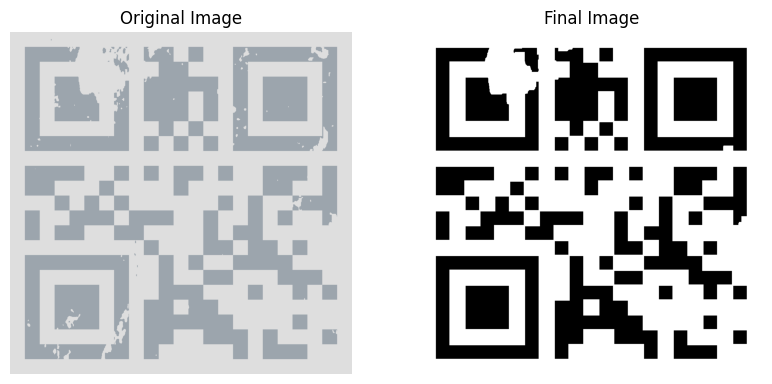

In [ ]:
#DAH AKHR WAHED BA3DEL FEEHHHHH
#bey3ady 14 testcases m3ada 3,14
#jocker:MALHH W FELFEL , The Mighty Finger , Caeser-cipher , V3-QR , get started
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

img = cv.imread(r'/content/sample_data/images/08-Compresso-Espresso.png')

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"

avg_pixel_value = np.mean(img)
std_dev_pixel_value = np.std(img) # amalto ashan lwo SD kan 3ale f daa hy2ole en fe variability 3alyaa f momkn aaul sa3thaa eno random distributed

print("Average pixel value:", avg_pixel_value)
print("Standard deviation of pixel value:", std_dev_pixel_value)

def detect_affine_transformation(img):
    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply median filter to remove salt and pepper noise
    median_filtered = cv.medianBlur(gray, 11)
    # Apply thresholding to remove gray background
    _, thresholded = cv.threshold(median_filtered, 150, 255, cv.THRESH_BINARY)
    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    open= cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    open= cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)
    erosion_kernel = np.ones((5, 5), np.uint8)
    erode = cv.erode(open, erosion_kernel, iterations=2)
    final = cv2.dilate(erode,erosion_kernel , iterations=2)

    # Apply Canny edge detection to find edges in the image
    edges = cv2.Canny(final, 50, 150)

    # Apply Hough Transform to detect lines in the image
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

    if lines is not None:
        # Analyze line orientations
        horizontal_lines = 0
        vertical_lines = 0
        for line in lines:
            rho, theta = line[0]
            # Convert theta to degrees
            angle_degrees = np.degrees(theta)
            # hena lw shaf ay line b angle ben el 80 w el 100 f da 8alebn kan horizontal abl el affine and same for VT
            if 80 <= angle_degrees <= 100 or 260 <= angle_degrees <= 280: #3ashan el actual angles of hz lines have orientations close to 90 degrees
                horizontal_lines += 1

            elif 10 <= angle_degrees <= 30 or 160 <= angle_degrees <= 170: #w el vt lines have orientations close to 0 or 180 degrees 3ashan kda bngeb el range mabenhom
                vertical_lines += 1

        # Check if there are significant numbers of both horizontal and vertical lines
        if horizontal_lines >= 2 and vertical_lines >= 2:
            return True

        else:
            return False


#de bt3ml detection l highest freq value in the image

def apply_high_pass_filter(img, threshold):
    # Compute the Fourier Transform of the image
    dft2 = np.fft.fft2(img)
    dft2_shift = np.fft.fftshift(dft2)  #shift the zero-frequency component to the center of the frequency spectrum
    magnitude_spectrum = np.max(np.abs(dft2_shift))
    # Threshold the magnitude to isolate high-frequency components
    high_frequency_mask = magnitude_spectrum > threshold

    return high_frequency_mask

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# kol el sowar leha angle f akbr angle le image heya dy el rotated
def detect_rotation_angle(img):
    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv.Canny(gray, 50, 150, apertureSize=3)
    # Apply Hough transform to detect lines
    lines = cv.HoughLines(edges, 1, np.pi / 180, 200)
    # Calculate the average angle of detected lines
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angles.append(theta)
    # Calculate the average angle
    avg_angle = np.mean(angles)
    # Convert angle from radians to degrees
    rotation_angle_degrees = math.degrees(avg_angle)
    return rotation_angle_degrees

# Detect rotation angle
rotation_angle = detect_rotation_angle(img)
print("rotation_angle",rotation_angle)

# Define a threshold angle for considering rotation
rotation_threshold = 100  # Adjust as needed



threshold_value=100
high_frequency_mask = apply_high_pass_filter(img, threshold_value)

affine_transformed = detect_affine_transformation(img)
print("affine transform:", affine_transformed)


if affine_transformed:

    print("Railfence-cipher")
    # Define source points (parallelogram vertices)
    src_points = np.float32([[40, 970], [700, 900], [300, 200]])
    dst_points = np.float32([[0, 20], [450, 0], [0, 500]])

    # Compute the affine transformation matrix
    matrix = cv2.getAffineTransform(src_points, dst_points)

    # Apply the affine transformation to the original image
    dst = cv2.warpAffine(img, matrix, (500, 550))

    # Flip the output image
    final_result = cv2.flip(dst, 0)

else:

  if abs(rotation_angle) > rotation_threshold:
    #if abs(rotation_angle - 180) > rotation_180_threshold:
    #print("Lefy bena y donya")
    print("Matswr 3edll ya3m")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    inverted_thresholded = cv2.bitwise_not(thresholded)
    inverted_colors = cv2.bitwise_not(img)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)

    rotated_image = rotate(foreground, angle=-7.5)

    # Calculate the dimensions of the canvas
    canvas_height = rotated_image.shape[0]
    canvas_width = rotated_image.shape[1]

    # Create a blank canvas with white background
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

    # Calculate the position to place the image slightly to the right
    top = 0
    left = 0
    # Paste the rotated image onto the canvas at the calculated position
    canvas[top:top+rotated_image.shape[0], left:left+rotated_image.shape[1]] = rotated_image
    final_result=255-canvas

  elif std_dev_pixel_value > threshold_value:

    print("jockerrr")
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Apply median filter to remove salt and pepper noise
    median_filtered = cv.medianBlur(gray, 11)
    # Apply thresholding to remove gray background
    _, thresholded = cv.threshold(median_filtered, 150, 255, cv.THRESH_BINARY)
    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    final_result= cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    final_result= cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)
    erosion_kernel = np.ones((5, 5), np.uint8)
    final_result = cv.erode(final_result, erosion_kernel, iterations=2)
    final_result = cv2.dilate(final_result,erosion_kernel , iterations=2)

  elif std_dev_pixel_value < threshold_value:
      # Check if the image is flipped vertically (bn2asm elsora top w bottom w bn compare el diff benhum w 7ata threshold lwo akbr mno ybaa elsora flipped vr)
      height, width, _ = img.shape
      top_half = img[:height // 2, :]
      bottom_half = img[height // 2:, :]
      intensity_diff = np.abs(top_half.astype(np.int32) - bottom_half.astype(np.int32))
      avg_intensity_diff = np.mean(intensity_diff)
      print("avg_intensity_diff", avg_intensity_diff )
      vertical_flip_threshold = 25

      if avg_intensity_diff > vertical_flip_threshold:
        if avg_pixel_value < threshold_value:
          print("black mirror")
          flipped_image = cv.flip(img, 1)
          gray = cv.cvtColor(flipped_image, cv.COLOR_BGR2GRAY)
          equalized_image = cv.equalizeHist(gray)
          final_result = cv.bitwise_not(equalized_image)

        elif abs(std_dev_pixel_value - avg_intensity_diff) < 1:  #ashan t check in elimage has relatively uniform texture
          print("My Phone fell & Beast mode ")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          # Threshold to identify grey pixels
          _, mask = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
          # Invert the mask to get the background
          background_mask = cv2.bitwise_not(mask)
          # Create a white background image
          white_background = np.full_like(img, 255)
          # Apply the background mask to fill the background with white
          output_image = cv2.bitwise_or(img, white_background, mask=background_mask)
          # Invert the edges image
          inverted_edges = cv2.bitwise_not(output_image)
          # Define the square kernel for opening
          kernel_opening = np.ones((5, 5), np.uint8)
          # Perform opening on the inverted edges image
          eroded_image = cv2.morphologyEx(inverted_edges, cv2.MORPH_OPEN, kernel_opening)
          # Define a larger square kernel for further opening
          kernel_dilation = np.ones((7, 3), np.uint8)
          # Perform opening again on the eroded image
          final_result = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, kernel_dilation)

        elif np.any(high_frequency_mask):
          print("Weweeweeeee")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          dft2 = np.fft.fft2(gray)
          dft2_shift = np.fft.fftshift(dft2)
          # Identify the highest noise frequency using thresholding
          threshold = 0.05
          noise_mask = np.abs(dft2_shift) < threshold * np.max(np.abs(dft2_shift))
          # Apply the filter to the Fourier spectrum to remove noise
          filtered_dft2_shift = dft2_shift.copy()
          filtered_dft2_shift[noise_mask] = 0
          # Reconstruct the image in the spatial domain using the inverse Fourier transform
          filtered_dft2 = np.fft.ifftshift(filtered_dft2_shift)
          filtered_image = np.abs(np.fft.ifft2(filtered_dft2))
          final2_image = gray - filtered_image
          # Apply thresholding to remove white-gray color
          thresholdV = 15  # Adjust this value as needed
          _, thresholded_image = cv2.threshold(final2_image, thresholdV, 255, cv2.THRESH_BINARY)
          # Apply dilation
          kernel_size = (20, 20)  # Adjust kernel size as needed
          iterations = 2  # Adjust number of iterations as needed
          dilated_image = cv2.dilate(thresholded_image, kernel=np.ones(kernel_size, np.uint8), iterations=iterations)
          # Apply erosion to remove black spots in the border
          erosion_kernel = np.ones(kernel_size, np.uint8)
          final_result = cv2.erode(dilated_image, kernel=erosion_kernel, iterations=iterations)


      elif avg_pixel_value > threshold_value:

        if std_dev_pixel_value < 10: # std <10 3ashan heya kolha loon wahd grey mafish variations f el std olayla 3aks el compresso espresso
          print("gone with the wind")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          # histogram equalization to enhance brightness and contrast
          equalized_image = cv.equalizeHist(gray)
          # binary thresholding to segment the foreground object
          _, thresholded_image = cv.threshold(equalized_image, 150, 255, cv.THRESH_BINARY)
          # closing operation to close small holes and gaps in the foreground
          kernel = np.ones((9, 9), np.uint8)
          final_result = cv.morphologyEx(thresholded_image, cv.MORPH_CLOSE, kernel)

        else:
          print("compresso espresso")
          gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
          # Apply opening
          kernel_opening = np.ones((22, 22), np.uint8)
          opened_image = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel_opening)
          # Apply dilation
          kernel_dilation = np.ones((5, 5), np.uint8)
          final_result = cv.dilate(opened_image, kernel_dilation, iterations=1)

      elif avg_pixel_value < threshold_value and std_dev_pixel_value < 10 :
            print("elnoor 2ata3")
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            # Thresholding to segment black regions
            _, binary_mask = cv.threshold(gray, 1, 255, cv.THRESH_BINARY)

            # Invert the binary mask
            binary_mask_inv = cv.bitwise_not(binary_mask)
            # Apply closing operation to the black regions
            kernel = cv.getStructuringElement(cv.MORPH_RECT, (40, 40))
            qr_code_closed = cv.morphologyEx(binary_mask_inv, cv.MORPH_CLOSE, kernel)
            # Invert the closed mask back to its original form
            final_result = cv.bitwise_not(qr_code_closed)



final_result = final_result

plt.figure(figsize=(15, 5))
 # Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(final_result, cmap='gray')
plt.title('Final Image')
plt.axis('off')
plt.show()


# **Preprocessing Images**

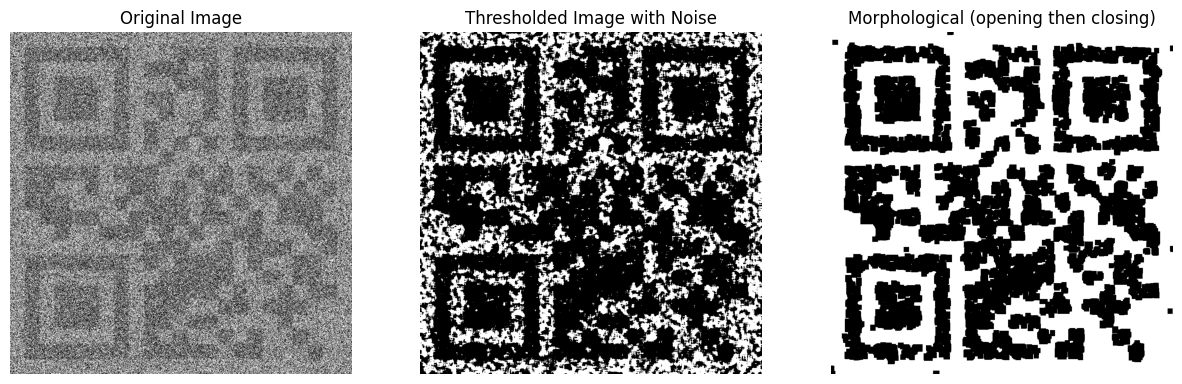

In [ ]:
#MALH W FLFL
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/12-mal7-w-felfel.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median filter to remove salt and pepper noise
    median_filtered = cv2.medianBlur(gray, 11)  # Adjust the kernel size as needed

    # Apply thresholding to remove gray background
    _, thresholded = cv2.threshold(median_filtered, 150, 255, cv2.THRESH_BINARY)

    # Morphological operations to remove small black noise regions
    kernel = np.ones((15, 15), np.uint8)
    Morpho= cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    Morpho = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Display the original, median filtered, and processed images side by side
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Thresholded image
    plt.subplot(1, 3, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image with Noise')
    plt.axis('off')

    # Filtered thresholded image
    plt.subplot(1, 3, 3)
    plt.imshow(Morpho, cmap='gray')
    plt.title('Morphological (opening then closing)')
    plt.axis('off')

    plt.show()


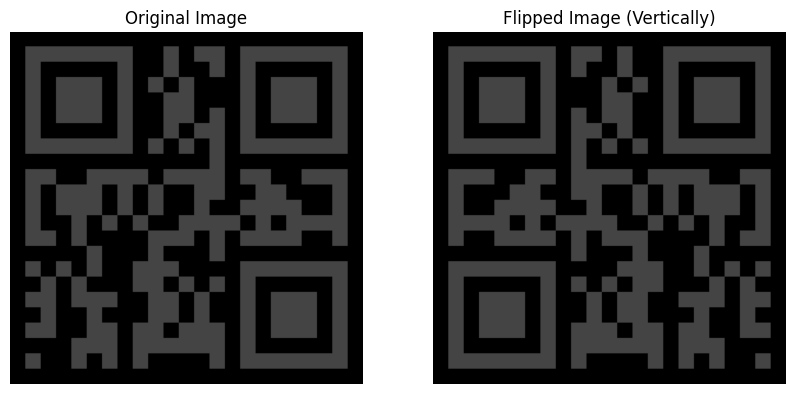

In [ ]:
#BLACK MIRROR ENHANCEMENT
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/04-Black-mirror.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Flip the image vertically
    flipped_image = cv2.flip(image, 1)

    # Display the loaded image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display the flipped image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Image (Vertically)')
    plt.axis('off')

    plt.show()


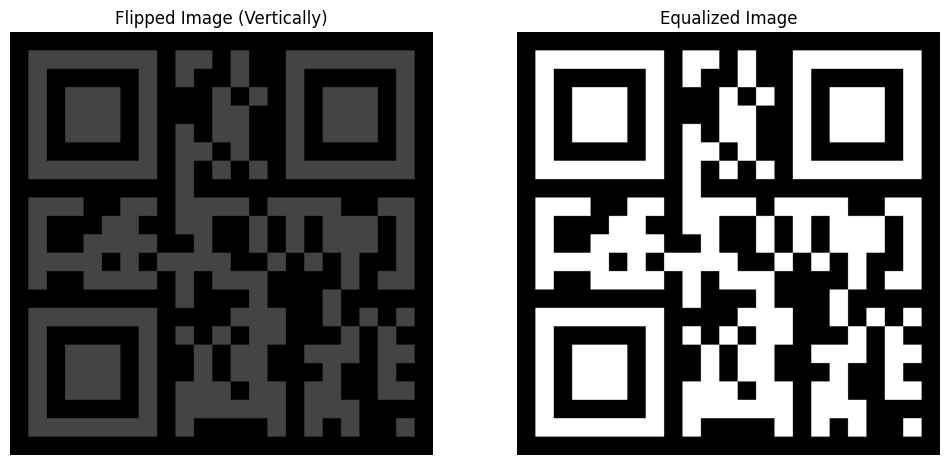

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/04-Black-mirror.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Flip the image vertically
    flipped_image = cv2.flip(image, 1)

    # Convert the flipped image to grayscale
    gray = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance brightness and contrast
    equalized_image = cv2.equalizeHist(gray)

    # Display the original and flipped images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Image (Vertically)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()


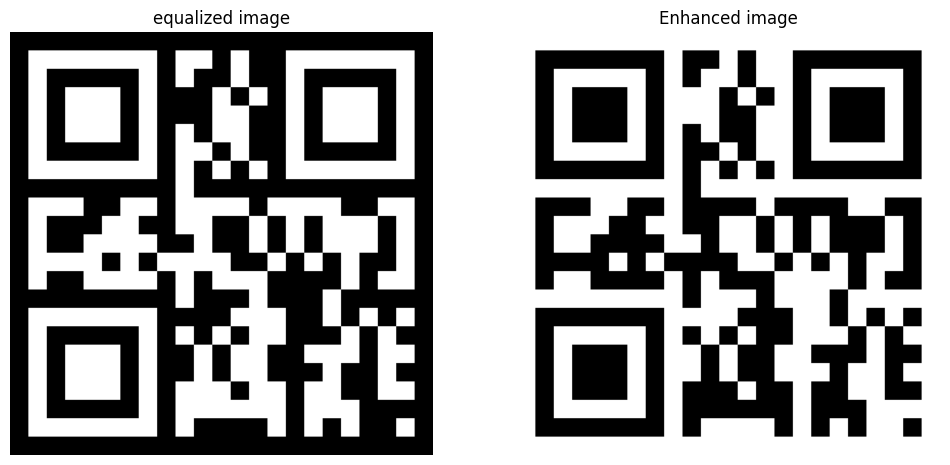

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/04-Black-mirror.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Flip the image vertically
    flipped_image = cv2.flip(image, 1)

    # Convert the flipped image to grayscale
    gray = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance brightness and contrast
    equalized_image = cv2.equalizeHist(gray)

    # Invert the colors in the flipped image
    inverted_image = cv2.bitwise_not(equalized_image)

    # Display the original and flipped images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('equalized image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Enhanced image')
    plt.axis('off')

    plt.show()


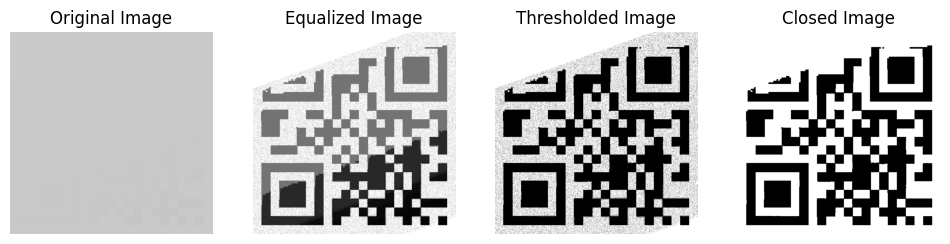

In [ ]:
#10-Gone-With-The-Wind
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/10-Gone-With-The-Wind.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance brightness and contrast
    equalized_image = cv2.equalizeHist(gray)

    # Apply binary thresholding to segment the foreground object
    _, thresholded_image = cv2.threshold(equalized_image, 200, 255, cv2.THRESH_BINARY)

    # Apply closing operation to close small holes and gaps in the foreground
    kernel = np.ones((7,7), np.uint8)
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Display the original, equalized, and thresholded images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(closed_image, cmap='gray')
    plt.title('Closed Image')
    plt.axis('off')

    plt.show()


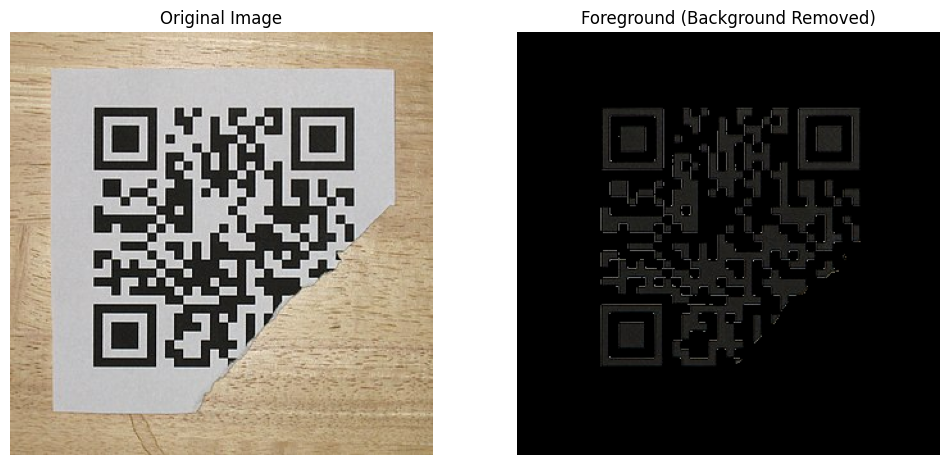

In [ ]:
#15.Beast-Mode-Computer-Vision
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    inverted_thresholded = cv2.bitwise_not(thresholded)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(image, image, mask=inverted_thresholded)

    # Display the loaded image and the foreground
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Foreground (Background Removed)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.title('Foreground (Background Removed)')
    plt.axis('off')

    plt.show()


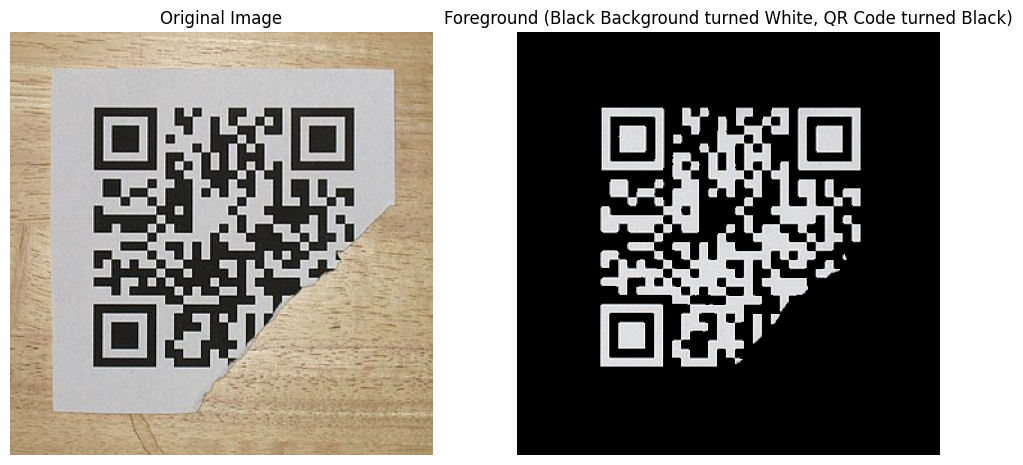

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    inverted_thresholded = cv2.bitwise_not(thresholded)

    # Invert the colors of the image (change black to white and white to black)
    inverted_colors = cv2.bitwise_not(image)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)


    # Display the loaded image and the foreground
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Foreground with black background turned white and QR code turned black
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.title('Foreground (Black Background turned White, QR Code turned Black)')
    plt.axis('off')

    plt.show()


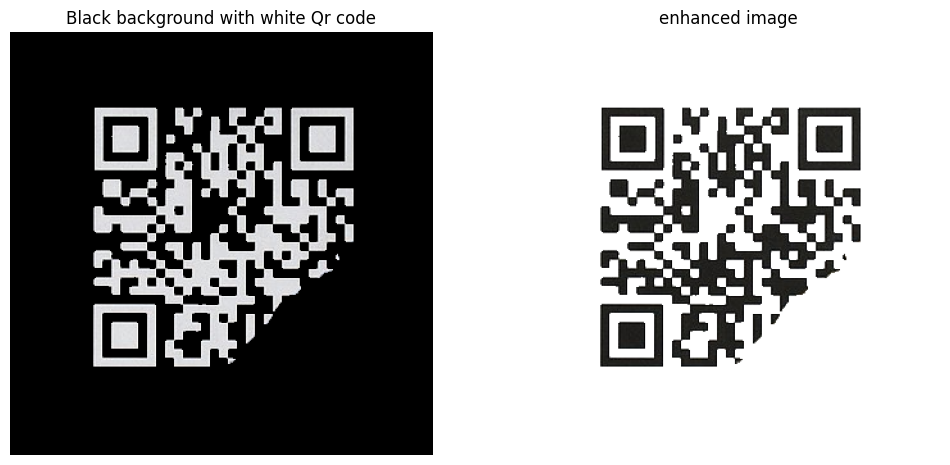

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    inverted_thresholded = cv2.bitwise_not(thresholded)

    # Invert the colors of the image (change black to white and white to black)
    inverted_colors = cv2.bitwise_not(image)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)

    inverted_image = cv2.bitwise_not( foreground)

    # Display the loaded image and the foreground
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.title('Black background with white Qr code')
    plt.axis('off')

    # Foreground with black background turned white and QR code turned black
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
    plt.title('enhanced image')
    plt.axis('off')

    plt.show()


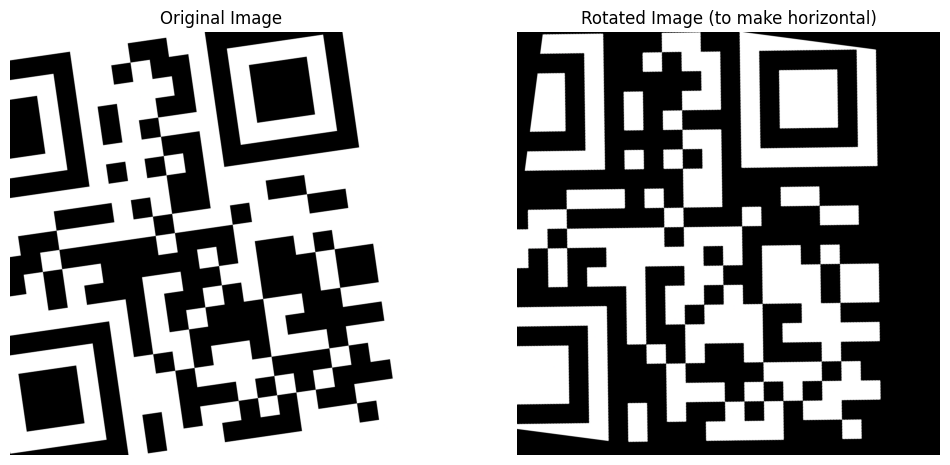

In [ ]:
#2-Matsawar-3edl-Ya3m
import cv2
import numpy as np
from matplotlib import pyplot as plt

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Load the image
image = cv2.imread(r'/content/sample_data/images /02-Matsawar-3edel-ya3am.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    inverted_thresholded = cv2.bitwise_not(thresholded)

    # Invert the colors of the image (change black to white and white to black)
    inverted_colors = cv2.bitwise_not(image)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)

    # Rotate the image to the right
    rotated_image = rotate(foreground, angle=-7.5)


    # Display the loaded image and the foreground
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Rotated Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image (to make horizontal)')
    plt.axis('off')

    plt.show()


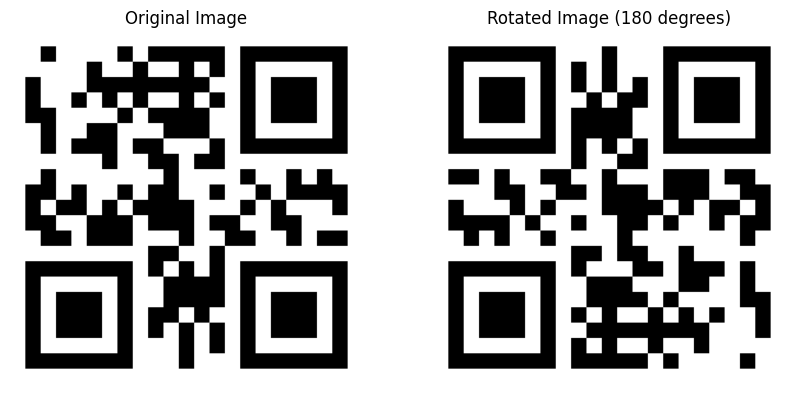

In [ ]:
#lefy bena ya donzz
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img_path = '/content/sample_data/images/03-Leffy-bina-ya-donya.png'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"


# Rotate the image by 180 degrees
rows, cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 180, 1)
rotated_img = cv.warpAffine(img, M, (cols, rows))

# Display the original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated Image (180 degrees)')
plt.axis('off')

plt.show()


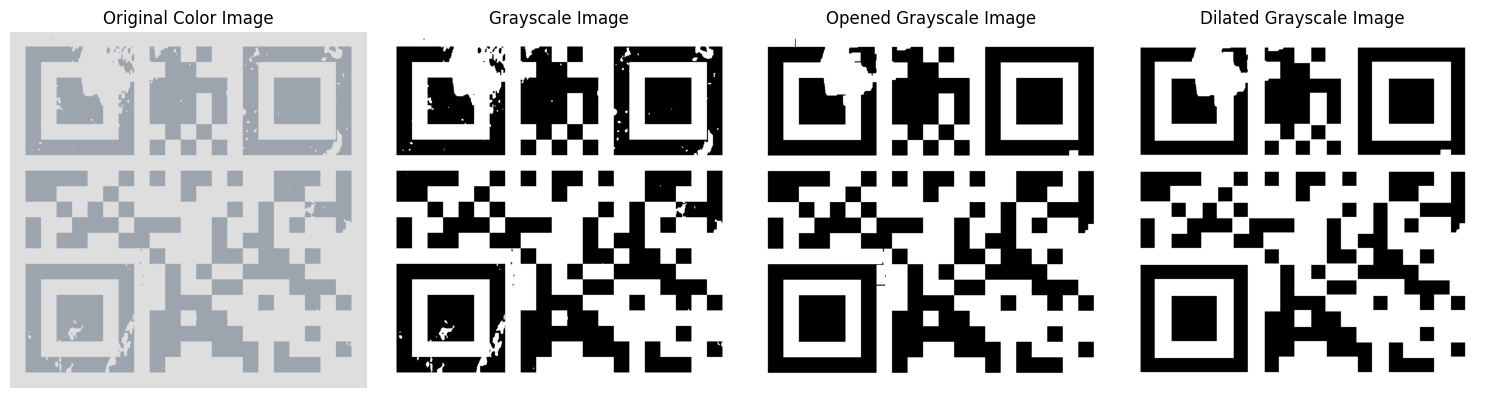

In [ ]:
#Compresso Esspreso
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/08-Compresso-Espresso.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply opening to the grayscale image
kernel_opening = np.ones((22, 22), np.uint8)  # Define the kernel for opening
opened_image = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel_opening)

# Apply dilation to the opened image
kernel_dilation = np.ones((5, 5), np.uint8)  # Define the kernel for dilation
dilated_image = cv2.dilate(opened_image, kernel_dilation, iterations=1)

# Plot the original, grayscale, opened, and dilated images
plt.figure(figsize=(15, 5))

plt.subplot(141), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image'), plt.axis('off')

plt.subplot(142), plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image'), plt.axis('off')

plt.subplot(143), plt.imshow(opened_image, cmap='gray')
plt.title('Opened Grayscale Image'), plt.axis('off')

plt.subplot(144), plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Grayscale Image'), plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-6-53adbe1c1a8b>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(np.round(x0)), int(np.round(y0))


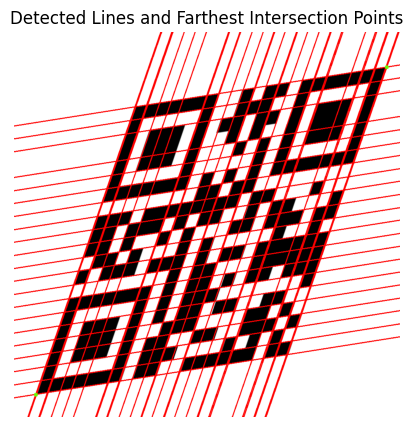

In [ ]:
#Railfence-cipher using hough transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/sample_data/images/06-Railfence-cipher.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Categorize lines into vertical and horizontal lines
vertical_lines = []
horizontal_lines = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        if np.pi / 4 < theta < 3 * np.pi / 4:  # If theta is close to pi/2, it's a vertical line
            vertical_lines.append([rho, theta])
        else:  # Otherwise, it's a horizontal line
            horizontal_lines.append([rho, theta])

def intersection(line1, line2):
    """Find the intersection point between two lines."""
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    return int(np.round(x0)), int(np.round(y0))

def farthest_points(intersections):
    """Find the farthest two points from a list of intersection points."""
    max_distance = 0
    farthest_points = None
    for i, point1 in enumerate(intersections[:-1]):
        for point2 in intersections[i+1:]:
            distance = np.linalg.norm(np.array(point1) - np.array(point2))
            if distance > max_distance:
                max_distance = distance
                farthest_points = (point1, point2)
    return farthest_points

# Find intersection points between vertical and horizontal lines
intersections = []
for v_line in vertical_lines:
    for h_line in horizontal_lines:
        intersections.append(intersection(v_line, h_line))

# Find the farthest two intersection points
farthest_pts = farthest_points(intersections)

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Calculate additional points x3, y3 and x4, y4
        x3 = int(x0 + 2000 * (-b))  # Extend the line in one direction
        y3 = int(y0 + 2000 * (a))
        x4 = int(x0 - 2000 * (-b))  # Extend the line in the opposite direction
        y4 = int(y0 - 2000 * (a))

        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)



# Draw the intersection points
if farthest_pts is not None:
    for point in farthest_pts:
        cv2.circle(image, point, 5, (0, 255, 100), -1)

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines and Farthest Intersection Points'), plt.axis('off')
plt.show()


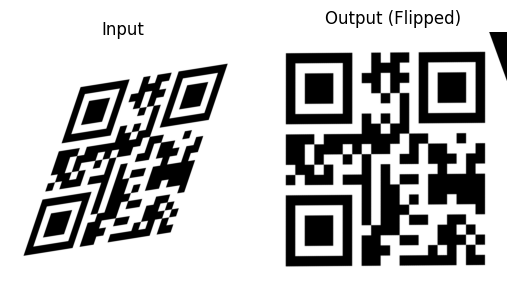

In [ ]:
#Railfence-cipher working
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread('/content/sample_data/images/06-Railfence-cipher.png')

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load the image.")
else:
    # Define source points (parallelogram vertices)
    src_points = np.float32([[40, 970], [700, 900], [300, 200]])


    dst_points = np.float32([[0, 20], [450, 0], [0, 500]])

    # Compute the affine transformation matrix
    matrix = cv2.getAffineTransform(src_points, dst_points)

    # Apply the affine transformation to the original image
    dst = cv2.warpAffine(img, matrix, (500, 550))

    # Flip the output image
    flipped_dst = cv2.flip(dst, 0)

    # Display the original and transformed images using matplotlib
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Input') ,plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(flipped_dst, cv2.COLOR_BGR2RGB)), plt.title('Output (Flipped)'),plt.axis('off')
    plt.show()


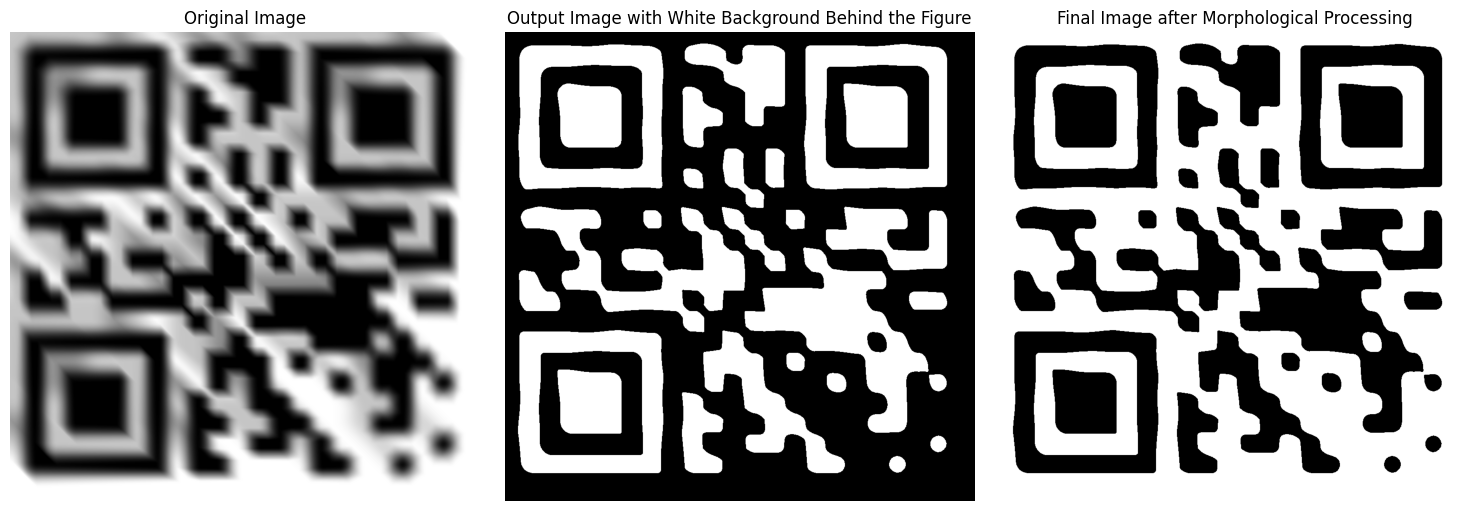

In [ ]:
#mobile we2e3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to identify grey pixels
_, mask = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)

# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Create a white background image
white_background = np.full_like(image, 255)

# Apply the background mask to fill the background with white
output_image = cv2.bitwise_or(image, white_background, mask=background_mask)

# Invert the edges image
inverted_edges = cv2.bitwise_not(output_image)

# Define the square kernel for opening
kernel_opening = np.ones((5, 5), np.uint8)

# Perform opening on the inverted edges image
eroded_image = cv2.morphologyEx(inverted_edges, cv2.MORPH_OPEN, kernel_opening)

# Define a larger square kernel for further opening
kernel_dilation = np.ones((7, 3), np.uint8)

# Perform opening again on the eroded image
dilated_image = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, kernel_dilation)

# Plot the original, output, and morphological processed images
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(132), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Output Image with White Background Behind the Figure'), plt.axis('off')

plt.subplot(133), plt.imshow(dilated_image, cmap='gray')
plt.title('Final Image after Morphological Processing'), plt.axis('off')

plt.tight_layout()
plt.show()


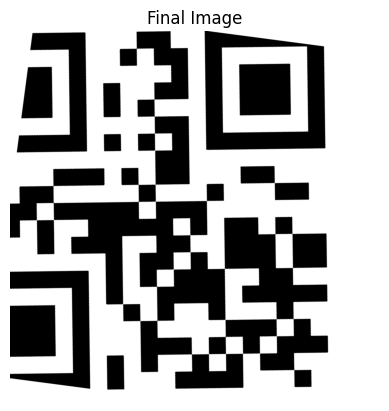

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Load the image
image = cv2.imread(r'/content/sample_data/images/02-Matsawar-3edel-ya3am.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding to segment the foreground
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    inverted_thresholded = cv2.bitwise_not(thresholded)

    # Invert the colors of the image (change black to white and white to black)
    inverted_colors = cv2.bitwise_not(image)

    # Apply bitwise AND operation to get the foreground
    foreground = cv2.bitwise_and(inverted_colors, inverted_colors, mask=inverted_thresholded)

    # Rotate the image to the right
    rotated_image = rotate(foreground, angle=-7.5)

    # Calculate the dimensions of the canvas
    canvas_height = rotated_image.shape[0]
    canvas_width = rotated_image.shape[1]

    # Create a blank canvas with white background
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

    # Calculate the position to place the image slightly to the right
    top = 0
    left = 0  # Adjust the shift here

    # Paste the rotated image onto the canvas at the calculated position
    canvas[top:top+rotated_image.shape[0], left:left+rotated_image.shape[1]] = rotated_image
    canvas=255-canvas
    # Display the centered and rotated image
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title('Final Image')
    plt.axis('off')
    plt.show()

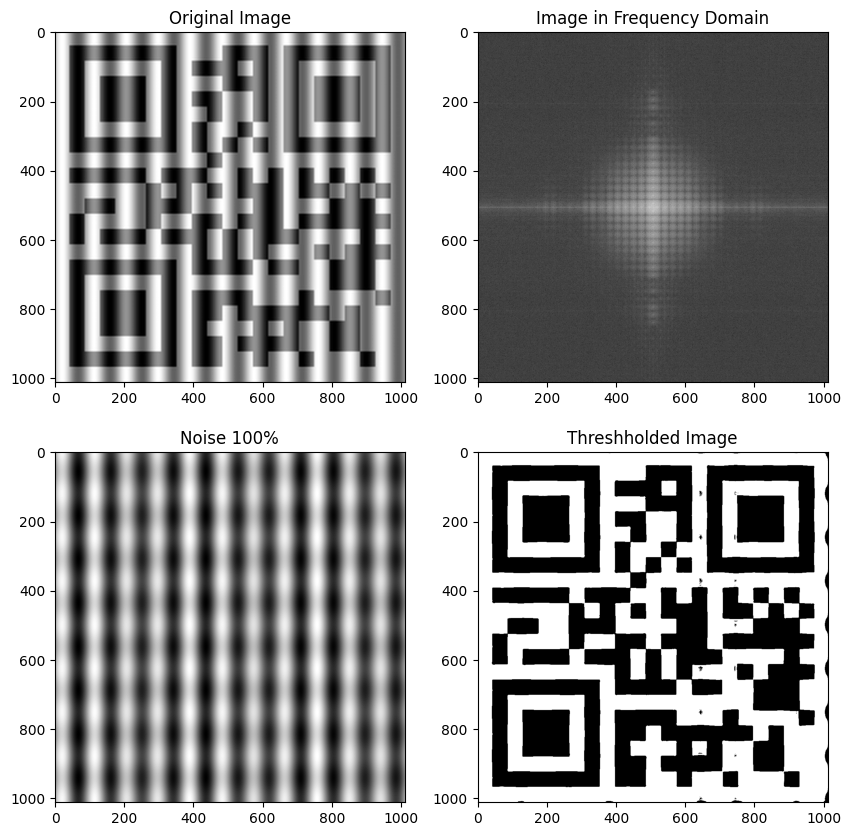

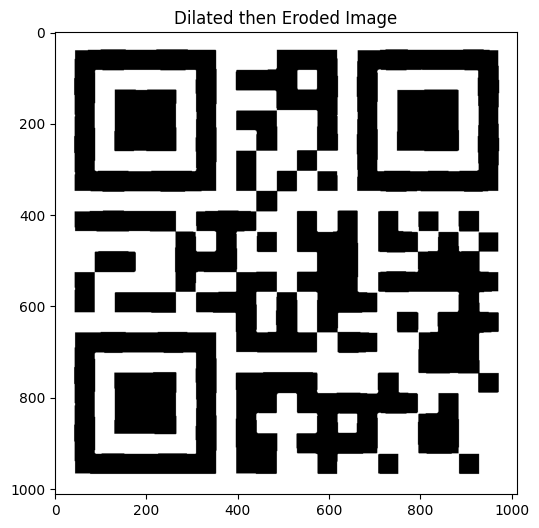

In [ ]:
#WEWEWEEEE
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image from file path
image_path = "/content/sample_data/images/11-weewooweewooweewoo.png"
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if noisy_image is None:
    print("Error: Unable to load the image from the provided path.")
    exit()

# Compute the Fourier transform of the noisy image
dft2 = np.fft.fft2(noisy_image)
dft2_shift = np.fft.fftshift(dft2)

# Identify the highest noise frequency using thresholding
threshold = 0.05
noise_mask = np.abs(dft2_shift) < threshold * np.max(np.abs(dft2_shift))

# Apply the filter to the Fourier spectrum to remove noise
filtered_dft2_shift = dft2_shift.copy()
filtered_dft2_shift[noise_mask] = 0

# Reconstruct the image in the spatial domain using the inverse Fourier transform
filtered_dft2 = np.fft.ifftshift(filtered_dft2_shift)
filtered_image = np.abs(np.fft.ifft2(filtered_dft2))
final2_image = noisy_image - filtered_image

# Apply thresholding to remove white-gray color
threshold_value = 5  # Adjust this value as needed
_, thresholded_image = cv2.threshold(final2_image, threshold_value, 255, cv2.THRESH_BINARY)

# Apply dilation
kernel_size = (15, 20)  # Adjust kernel size as needed
iterations = 2  # Adjust number of iterations as needed
dilated_image = cv2.dilate(thresholded_image, kernel=np.ones(kernel_size, np.uint8), iterations=iterations)

# Apply erosion to remove black spots in the border
erosion_kernel = np.ones(kernel_size, np.uint8)
eroded_image = cv2.erode(dilated_image, kernel=erosion_kernel, iterations=iterations)

# Create subplots and display images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Display the images in the subplots
axes[0, 0].imshow(noisy_image, cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(np.log(1 + np.abs(dft2_shift)), cmap='gray')
axes[0, 1].set_title('Image in Frequency Domain')

axes[1, 0].imshow(filtered_image, cmap='gray')
axes[1, 0].set_title('Noise 100%')

axes[1, 1].imshow(thresholded_image, cmap='gray')
axes[1, 1].set_title('Threshholded Image')

plt.figure(figsize=(6, 6))
plt.imshow(eroded_image, cmap='gray')
plt.title('Dilated then Eroded Image')
plt.show()


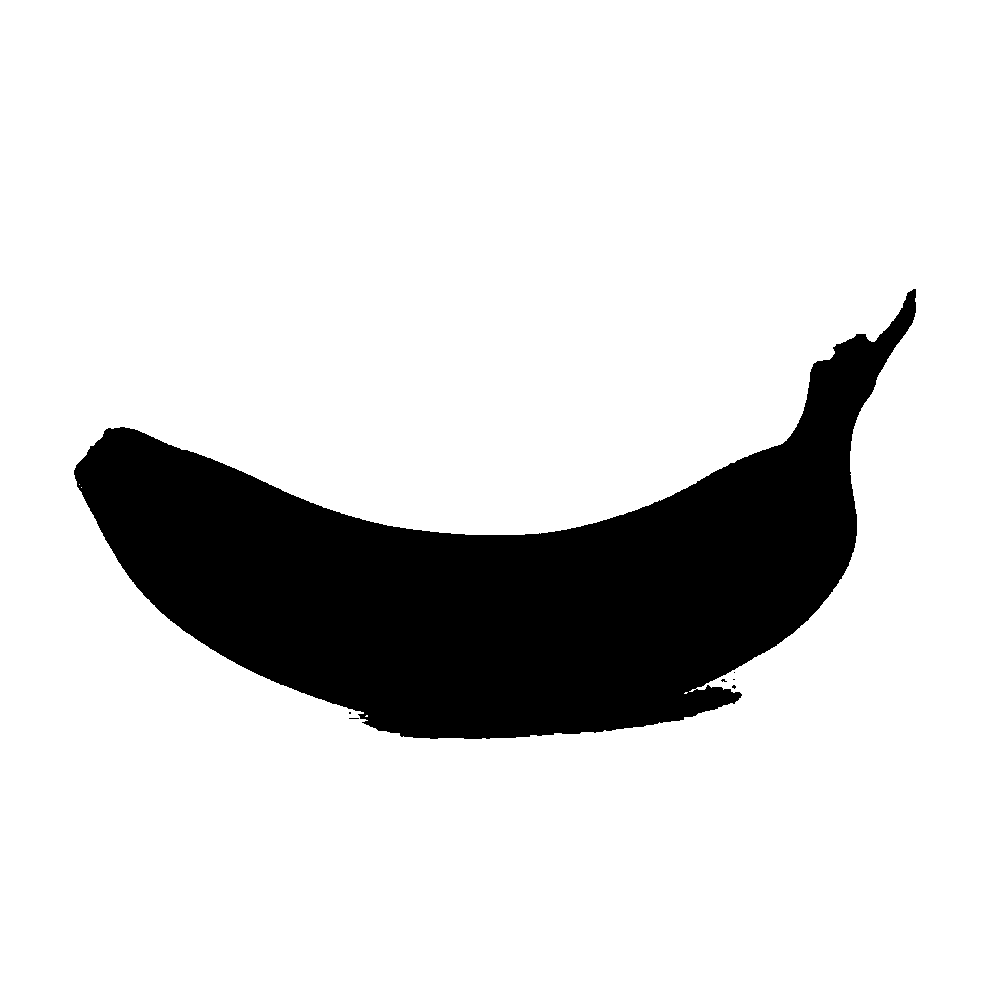

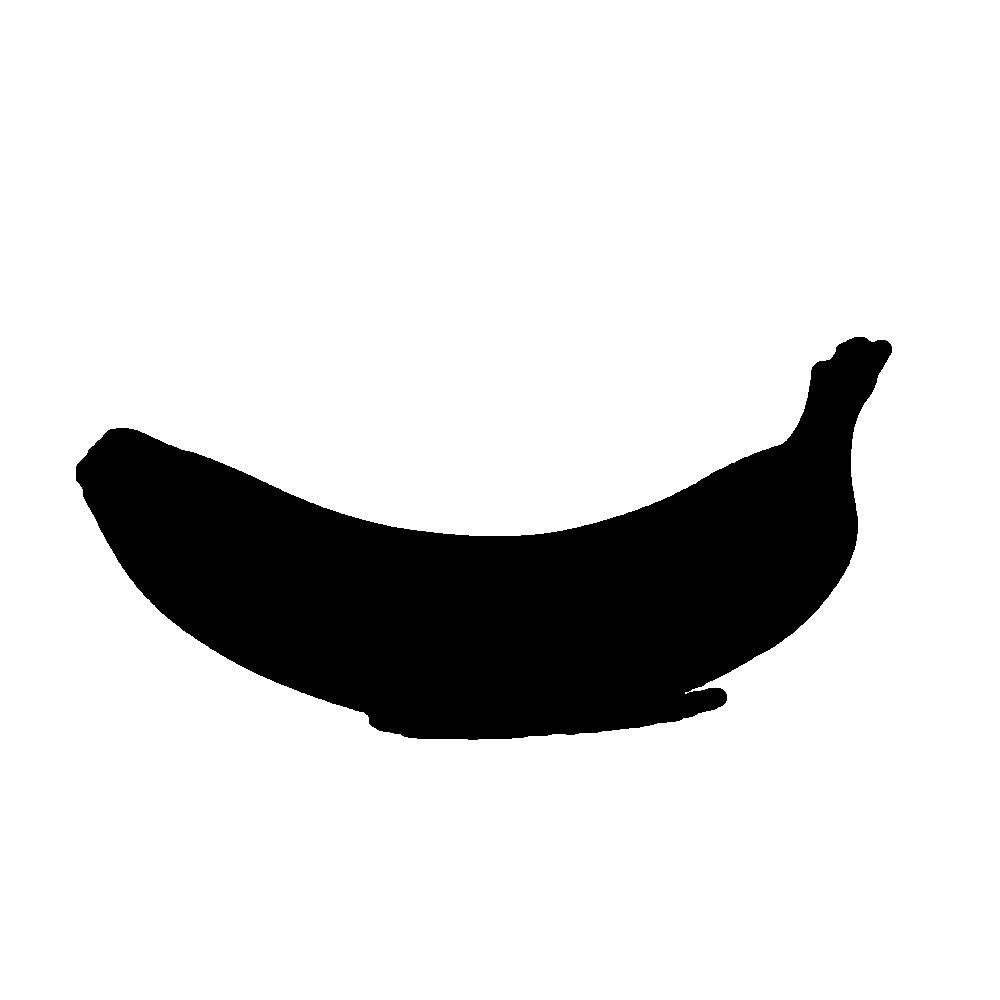

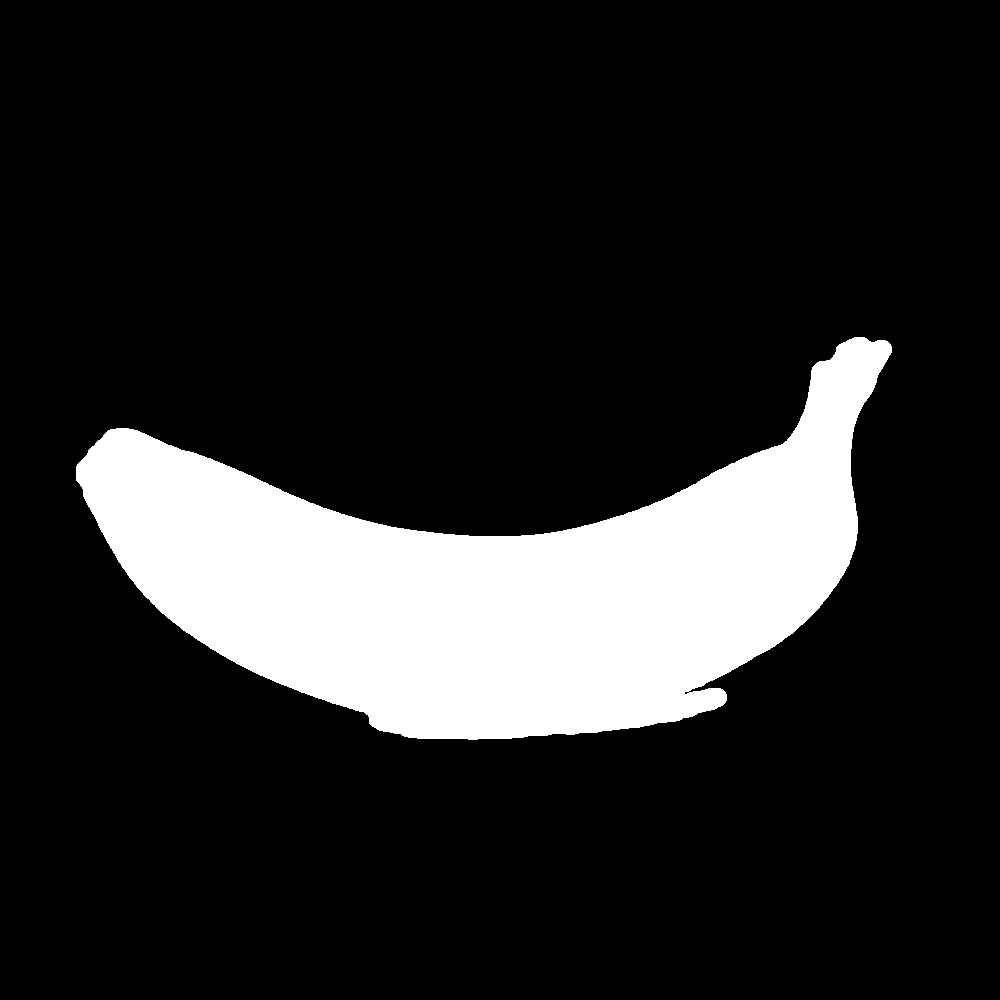

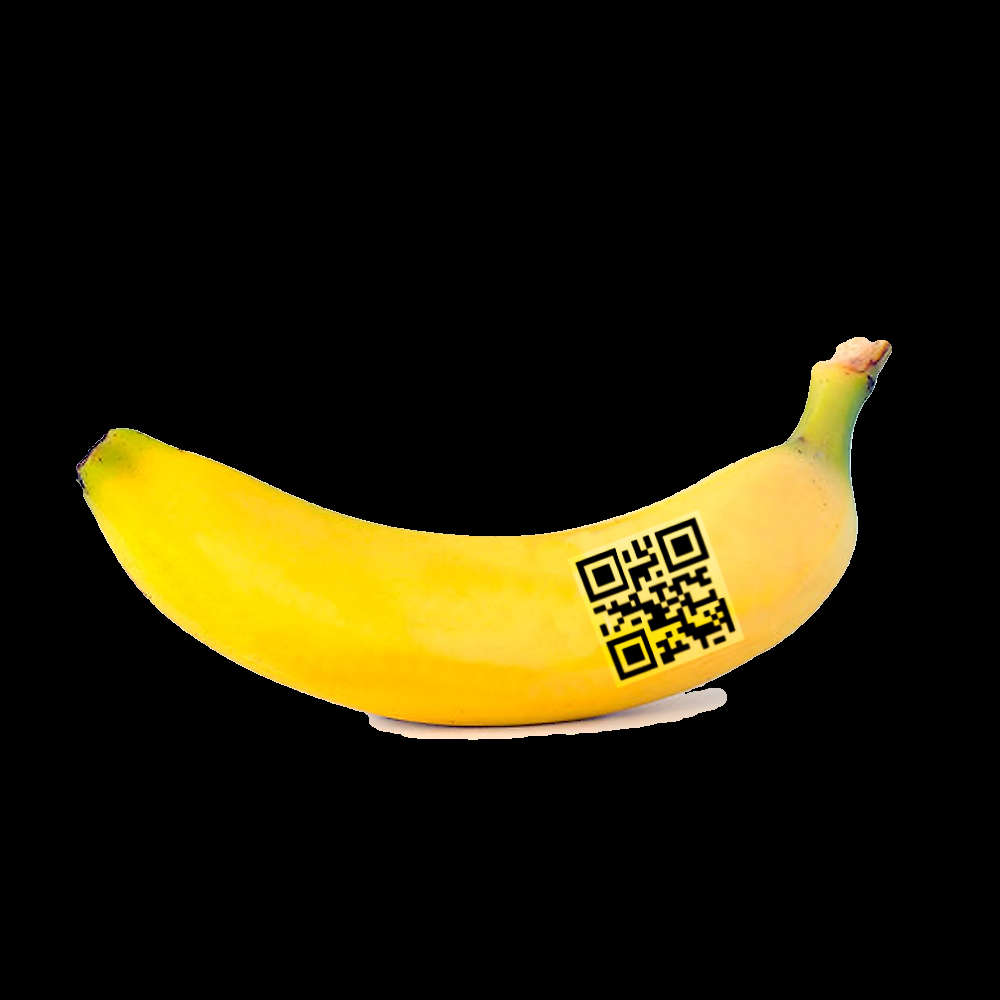

True

In [ ]:
#14-BANANAAAA!!!!!
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Read image
img = cv2.imread(r'/content/sample_data/images/14-BANANAAA!!!.png')
hh, ww = img.shape[:2]

# Threshold on white
# Define lower and upper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select white
thresh = cv2.inRange(img, lower, upper)

# Apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Invert morph image
mask = 255 - morph

# Apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

# Display intermediate images using cv2_imshow
cv2_imshow(thresh)
cv2_imshow(morph)
cv2_imshow(mask)
cv2_imshow(result)

# Save intermediate and result images
cv2.imwrite('ban_thresh.jpg', thresh)
cv2.imwrite('ban_morph.jpg', morph)
cv2.imwrite('ban_mask.jpg', mask)
cv2.imwrite('ban_result.jpg', result)

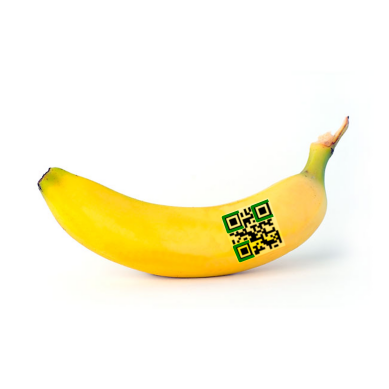

In [ ]:
#Banana trial 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/images/14-BANANAAA!!!.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to find squares
squares = []
for contour in contours:
    # Approximate the contour to a polygon
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

    # Check if the contour has 4 vertices (a square)
    if len(approx) == 4:
        # Check if the contour is convex
        if cv2.isContourConvex(approx):
            squares.append(approx)

# Plot the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot all the detected squares
for square in squares:
    # Convert OpenCV contour to numpy array for plotting
    square = square.reshape(-1, 2)

    # Plot the square contour
    plt.plot(square[:, 0], square[:, 1], color='green', linewidth=2)

# Show the plot
plt.axis('off')
plt.show()



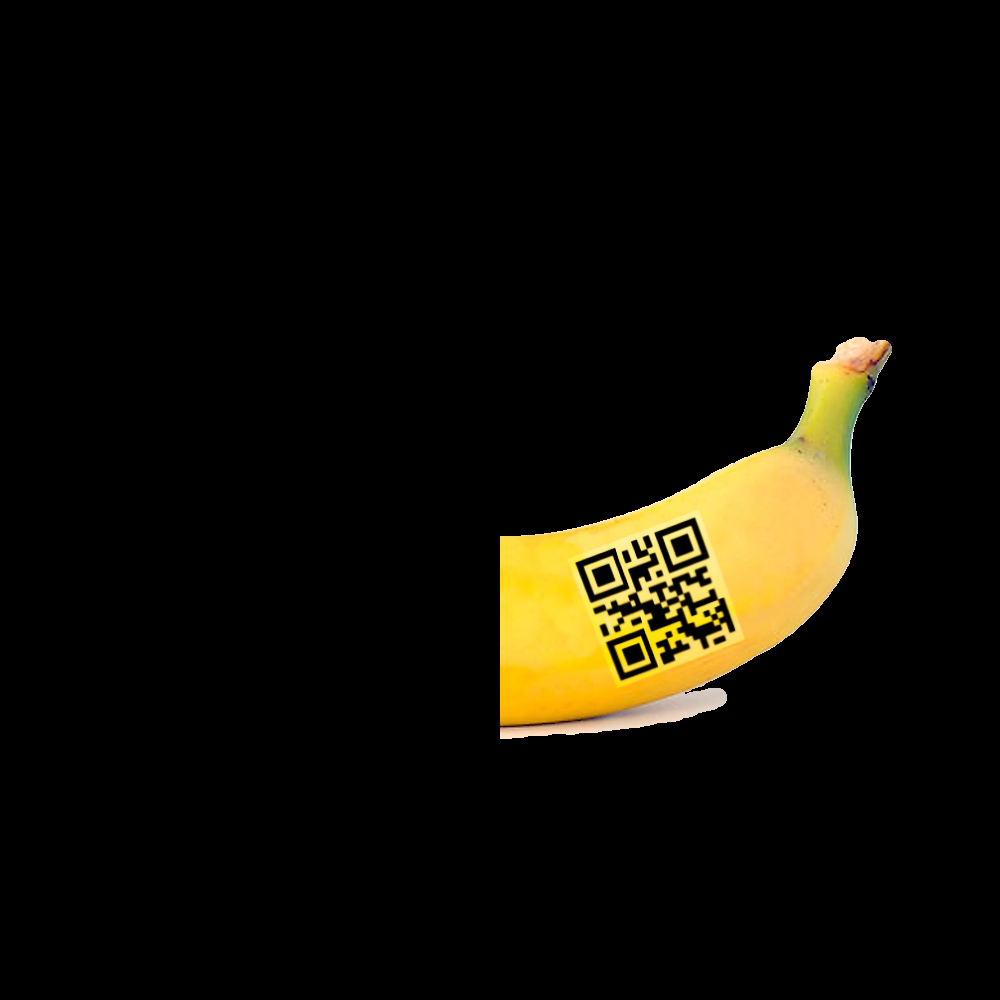

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read image
img = cv2.imread('/content/sample_data/images/14-BANANAAA!!!.png')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and upper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

# Create a mask to keep only the right half of the image
right_mask = np.zeros_like(mask)
right_mask[:, ww//2:] = 255

# Apply the right mask to the result image
result_right_half = cv2.bitwise_and(result, result, mask=right_mask)

# Display the result image with only the right half of the banana
cv2_imshow(result_right_half)

cv2.waitKey(0)
cv2.destroyAllWindows()


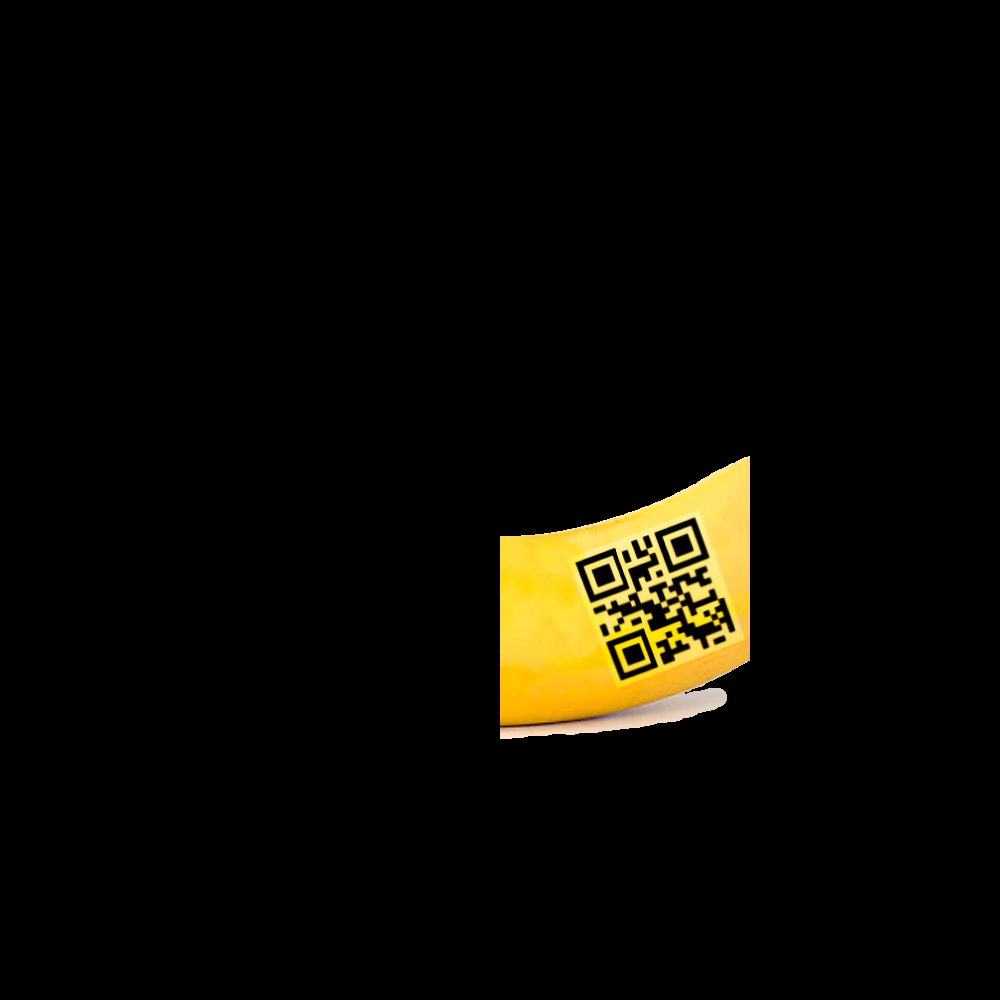

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read image
img = cv2.imread('/content/sample_data/images/14-BANANAAA!!!.png')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and upper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

# Calculate the width for cutting 1/3 from the right
cut_width = ww // 4

# Create a mask to keep only the left 2/3 of the image
left_mask = np.zeros_like(mask)
left_mask[:, :ww-cut_width] = 255

# Apply the left mask to the result_right_half image
result_left_cut = cv2.bitwise_and(result_right_half, result_right_half, mask=left_mask)

# Display the result image with 1/3 cut from the right
cv2_imshow(result_left_cut)

cv2.waitKey(0)
cv2.destroyAllWindows()


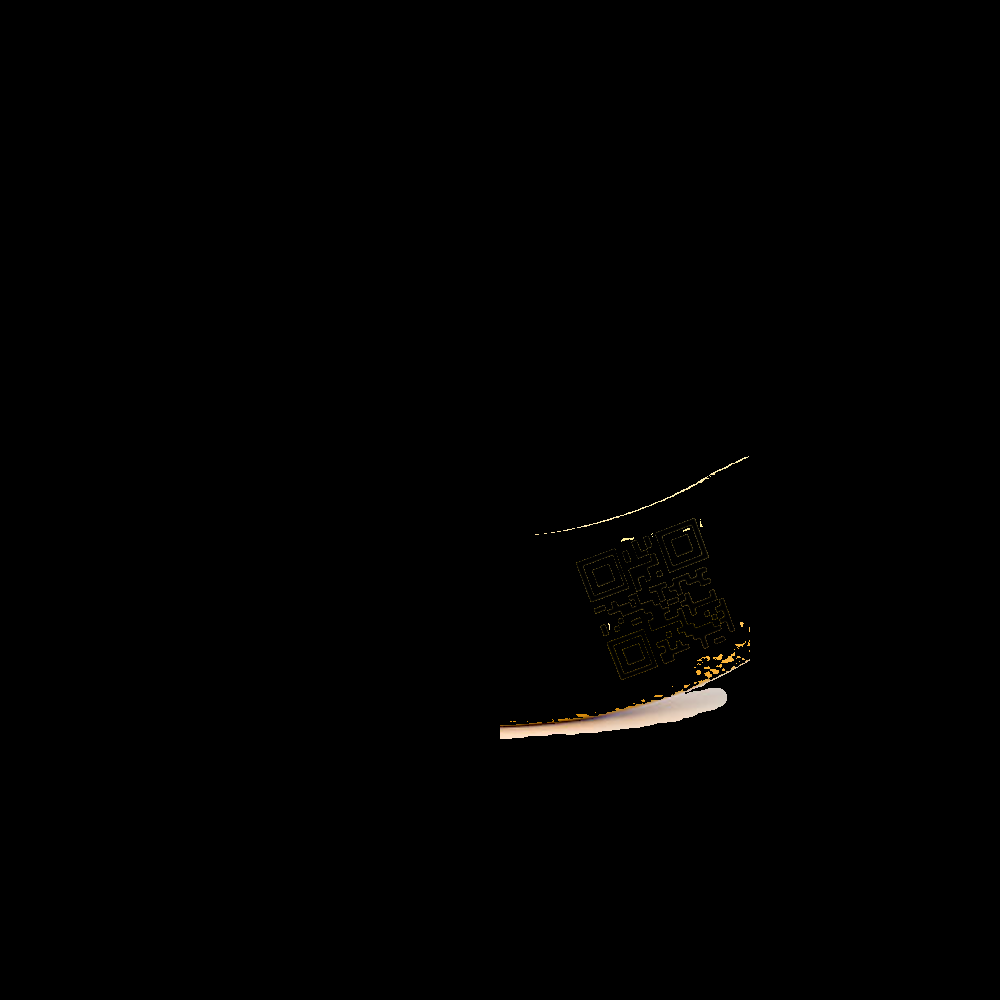

In [ ]:
import cv2

# Read image
img = cv2.imread('/content/sample_data/images/14-BANANAAA!!!.png')
hh, ww = img.shape[:2]

# Convert image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define lower and upper HSV thresholds for yellow color
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Create mask to select yellow regions
yellow_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Invert the mask to get the yellow regions
yellow_regions = cv2.bitwise_not(yellow_mask)

# Remove yellow background from the result_left_cut image
result_no_yellow_bg = cv2.bitwise_and(result_left_cut, result_left_cut, mask=yellow_regions)

# Display the result image with QR codes detected and yellow background removed
cv2_imshow(result_no_yellow_bg)

cv2.waitKey(0)
cv2.destroyAllWindows()


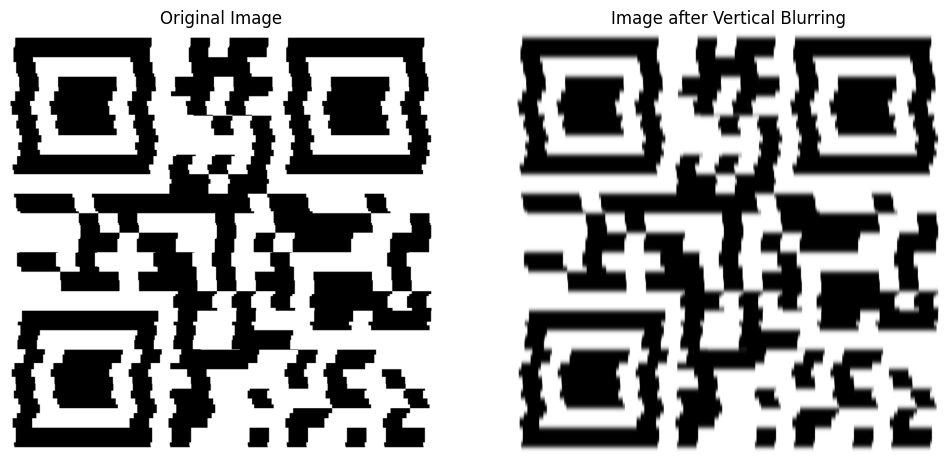

In [ ]:
#5-Caesar-cipher
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'/content/sample_data/images/05-Caesar-cipher.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply vertical blurring
    blurred_vertical = cv2.GaussianBlur(gray, (1, 31), 0)  # Larger kernel along the vertical direction

    # Display both the original image and the output image
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')  # Turn off axis numbers and ticks

    # Output Image after Vertical Blurring
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_vertical, cmap='gray')
    plt.title('Image after Vertical Blurring')
    plt.axis('off')  # Turn off axis numbers and ticks

    plt.show()


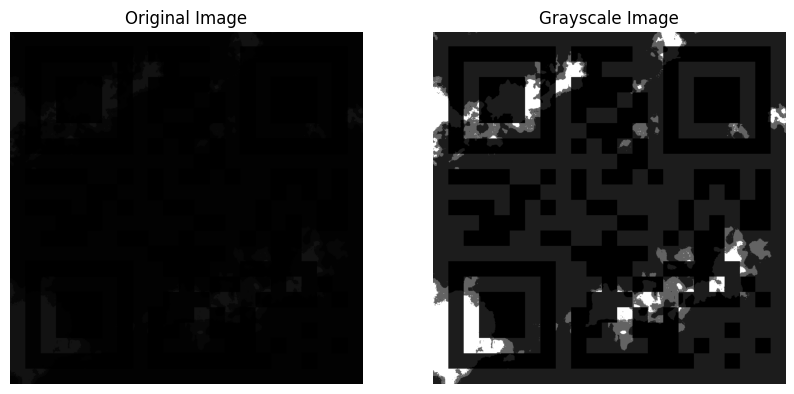

In [ ]:
#Elnoor 2ataa3333
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/Images/13-2el-noor-2ata3.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the loaded image
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.show()


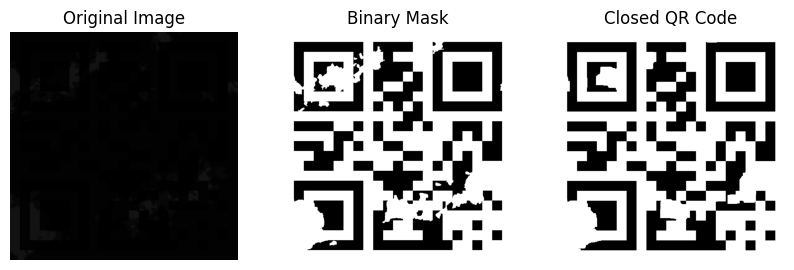

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/sample_data/Images/13-2el-noor-2ata3.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding to segment black regions
    _, binary_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Invert the binary mask
    binary_mask_inv = cv2.bitwise_not(binary_mask)

    # Apply closing operation to the black regions
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
    qr_code_closed = cv2.morphologyEx(binary_mask_inv, cv2.MORPH_CLOSE, kernel)

    # Invert the closed mask back to its original form
    qr_code_closed = cv2.bitwise_not(qr_code_closed)

    # Display the result
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display binary mask
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')

    # Display closed QR code
    plt.subplot(1, 3, 3)
    plt.imshow(qr_code_closed, cmap='gray')
    plt.title('Closed QR Code')
    plt.axis('off')

    plt.show()

